In [114]:
from sklearn import cluster, datasets
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from numpy import genfromtxt
from sklearn import  metrics
from sklearn import preprocessing

In [115]:
def elbow(df1):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
        km.fit(df1)
        distortions.append(km.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    #plt.savefig('images/11_03.png', dpi=300)
    plt.show()

In [116]:
def hierarchy_clusting(df1):
    index=df1.index
    # print(index)
    columns=df1.columns
    # print(columns)
    # print(df1)
    data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
    data_scaled_minmax = data_scaler_minmax.fit_transform(df1)
    print("\nMin max scaled data:\n", data_scaled_minmax)
    data_scaled_minmax=pd.DataFrame(data_scaled_minmax,index=index,columns=columns)
    row_clusters = linkage(data_scaled_minmax.values, method='complete', metric='euclidean')
    pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])
    dendrogram(row_clusters,labels =df1.index)
    cmap = sns.cm.rocket_r ## cmap為控制顏色的 預設為 sns.cm.rocket
    sns.clustermap(data_scaled_minmax,method ='ward',metric='euclidean',cmap=cmap)
    plt.show()

             214216    214222    214210    214200    214198    214238  \
誰怕尖嘴妖         0.616  0.000000  0.000000  0.763158  0.506329  0.523179   
水從哪裡來?        0.000  0.000000  0.000000  0.618421  0.531646  0.000000   
地底探險1000里     0.584  0.000000  0.000000  0.684211  0.481013  0.000000   
打不開的寶藏        0.000  0.645349  0.581081  0.644737  0.594937  0.000000   
小星星           0.000  0.000000  0.000000  0.625000  0.000000  0.000000   
...             ...       ...       ...       ...       ...       ...   
坐車來的圖書館       0.000  0.988372  0.000000  0.000000  0.930380  0.000000   
ㄒㄧㄚˋ老師的秘密武器   0.936  0.000000  0.000000  0.000000  0.000000  0.000000   
怪博士與妙博士       0.000  0.000000  0.000000  0.000000  0.000000  0.000000   
歡迎光臨餓蘑島       0.976  0.000000  1.000000  0.000000  0.000000  0.000000   
芽門、彩花籽與小小巫婆   0.000  0.000000  0.979730  0.000000  0.000000  0.000000   

               214214    214202  214220    214250  ...    214212  214218  \
誰怕尖嘴妖        0.000000  0.000000     0.0  0.0000

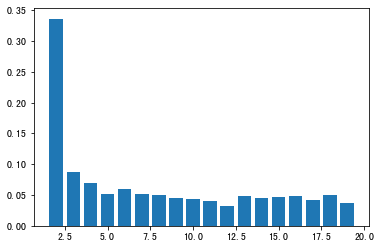

In [117]:

df1 = pd.read_csv("閱讀順序矩陣_依照編號(書名版).csv",index_col=0,header=0,encoding='utf-8')
df1=df1.loc[:, (df1 != 0).any(axis=0)]  ## 把dataframe的col部分 不等於0的col取出並重新指定入df1
df1= df1.loc[:, (df1 != 1).any(axis=0)]   ##把dataframe的col部分 不等於1的col取出並重新指定入df1
index=df1.index
# print(index)
columns=df1.columns
# print(columns)
# print(df1)
df1 = normalize(df1, axis=1, norm='max')  ##對列進行標準化
df1=pd.DataFrame(df1,index=index,columns=columns)    
# print(df1)
df1=df1.T    ## 將標準化後的矩陣轉至
print(df1)
silhouette_avgs = []
ks = range(2, 20)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(df1)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(df1, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
# 作圖並印出 k = 2 到 20 的績效
plt.bar(ks, silhouette_avgs)


print(silhouette_avgs)

plt.show()


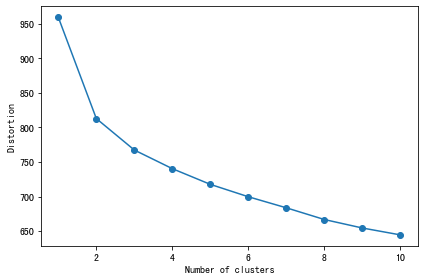

[[5.20000000e+01 2.33000000e+02 1.06951872e-02 2.00000000e+00]
 [2.32000000e+02 2.35000000e+02 1.37506176e-02 2.00000000e+00]
 [2.34000000e+02 3.95000000e+02 2.11362316e-02 3.00000000e+00]
 ...
 [7.75000000e+02 7.83000000e+02 3.87843839e+00 3.68000000e+02]
 [7.81000000e+02 7.82000000e+02 4.04481998e+00 2.60000000e+01]
 [7.84000000e+02 7.85000000e+02 4.84419468e+00 3.94000000e+02]]


C:\Users\kalai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kalai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8231 missing from current font.
  font.set_text(s, 0, flags=flags)


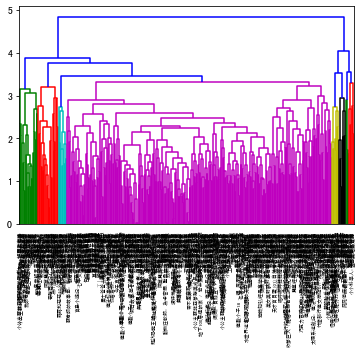

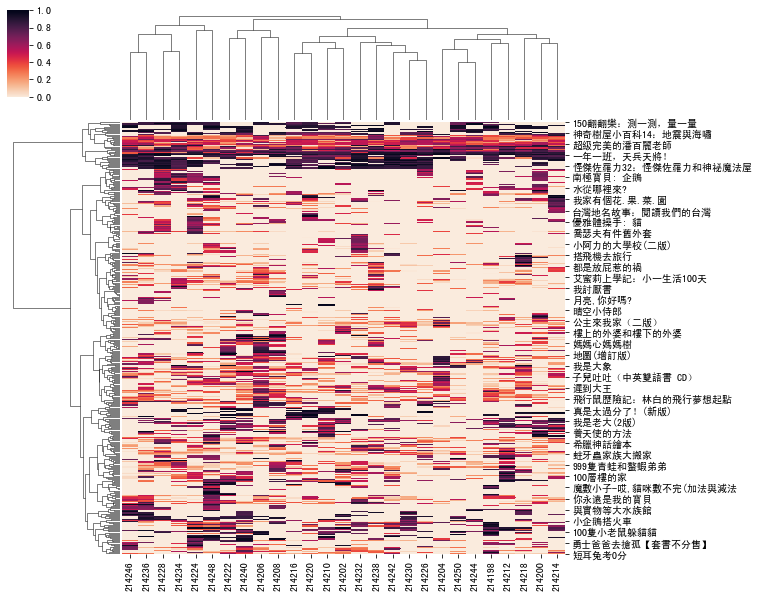

In [118]:
elbow(df1)
row_clusters = linkage(df1.values, method='complete', metric='euclidean')
print(row_clusters)
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])
dendrogram(row_clusters,labels =df1.index)

cmap = sns.cm.rocket_r ## cmap為控制顏色的 預設為 sns.cm.rocket
sns.clustermap(df1,method ='ward',metric='euclidean',cmap=cmap)
plt.show()

# 用sk learn標準化在跑一次書籍分群

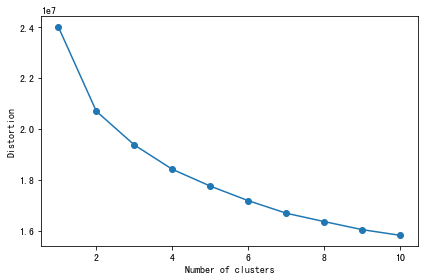


Min max scaled data:
 [[0.616      0.         0.         ... 0.         0.         0.53773585]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.584      0.         0.         ... 0.         0.         0.54245283]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.976      0.         1.         ... 0.         0.         0.        ]
 [0.         0.         0.97972973 ... 0.         0.         0.        ]]


C:\Users\kalai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8231 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kalai\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8231 missing from current font.
  font.set_text(s, 0, flags=flags)


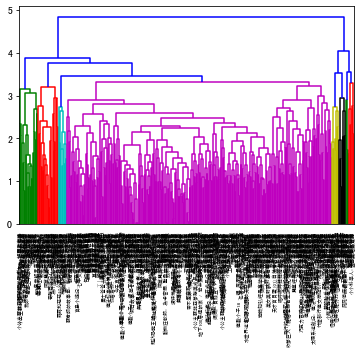

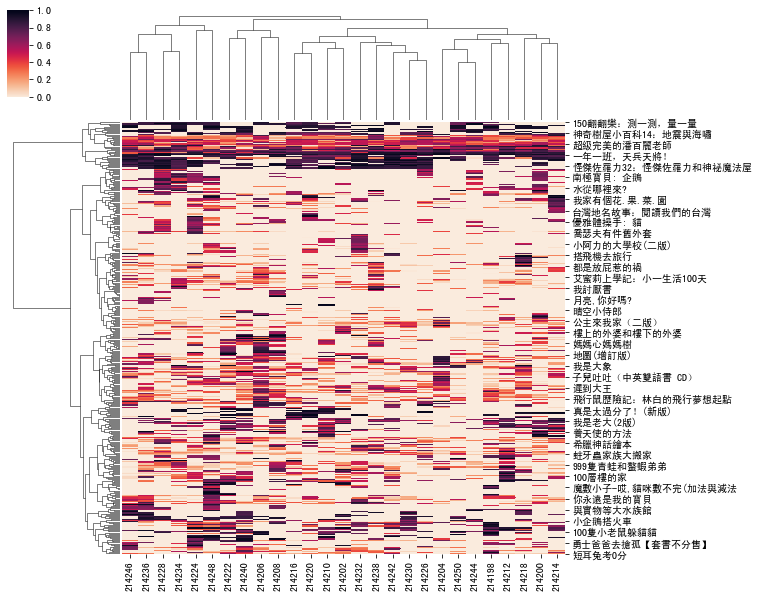

In [119]:
df1 = pd.read_csv("閱讀順序矩陣_依照編號(書名版).csv",index_col=0,header=0,encoding='utf-8')
df1=df1.loc[:, (df1 != 0).any(axis=0)]  ## 把dataframe的col部分 不等於0的col取出並重新指定入df1
df1= df1.loc[:, (df1 != 1).any(axis=0)]   ##把dataframe的col部分 不等於1的col取出並重新指定入df1
df1=df1.T
index=df1.index
columns=df1.columns
elbow(df1)
hierarchy_clusting(df1)

# 學生的分群實作

In [120]:
import numpy as np
import pymysql
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import  metrics
import matplotlib.pyplot as plt
import seaborn as sns

# 轉折演算法

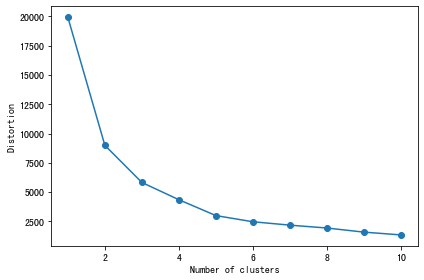

In [121]:
df1 = pd.read_excel("學生閱讀書籍難度表.xlsx",index_col=0)
elbow(df1)

# 輪廓係數

        繪本書  橋梁書  初階文字書  中階文字書  高階文字書
214216   78   22     25      0      0
214222  108   26     37      1      0
214210   97   19     31      1      0
214200  105   23     23      1      0
214198  115   22     20      1      0
214238  109   26     15      1      0
214214   97   24     27      1      0
214202   85   26     36      1      0
214220   72   37     36      1      0
214250   68    9     15      2      0
214246   99   33     17      0      0
214240  123   34     37      2      0
214230   65   28     13      1      0
214226   84   22     16      2      0
214204   80   12      9      0      0
214206  144   16     10      1      0
214208  137   19     19      3      0
214212  110   11     17      1      0
214218  110   30     18      1      0
214224  136   36     34      0      0
214228  137   23      9      2      0
214232   94   41     30      2      0
214234  111   24     23      1      0
214236  128   32     25      2      0
214242   77   29     26      0      0
214244   62 

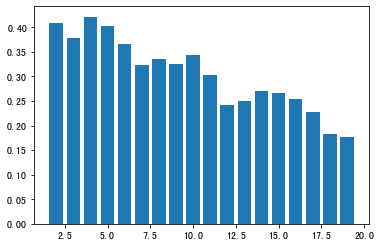

[0.40855730634781323, 0.3774534256082585, 0.4217152741773248, 0.403612810527028, 0.36522416841455807, 0.3236761470641292, 0.3352441744541585, 0.3263534232781983, 0.34421757763734473, 0.30201884377939786, 0.24290730093926327, 0.25057857921885746, 0.2703168171848294, 0.26694009580814254, 0.2539047212178993, 0.22704382387295213, 0.18351320525096362, 0.17724829877574308]


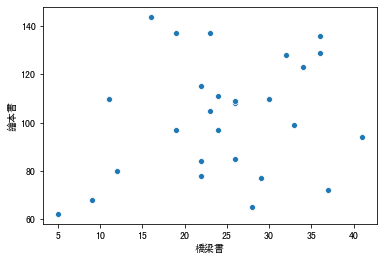

In [122]:

df1 = pd.read_excel("學生閱讀書籍難度表.xlsx",index_col=0)
print(df1)
silhouette_avgs = []
ks = range(2, 20)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(df1)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(df1, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()

print(silhouette_avgs)


sns.scatterplot(df1.橋梁書,df1.繪本書)
# sns.scatterplot(df1.bridege,df1.low_book)
plt.show()

In [123]:
from sklearn import cluster, datasets
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

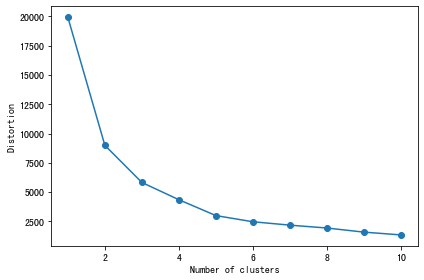


Min max scaled data:
 [[0.19512195 0.47222222 0.43243243 0.         0.        ]
 [0.56097561 0.58333333 0.75675676 0.33333333 0.        ]
 [0.42682927 0.38888889 0.59459459 0.33333333 0.        ]
 [0.52439024 0.5        0.37837838 0.33333333 0.        ]
 [0.64634146 0.47222222 0.2972973  0.33333333 0.        ]
 [0.57317073 0.58333333 0.16216216 0.33333333 0.        ]
 [0.42682927 0.52777778 0.48648649 0.33333333 0.        ]
 [0.2804878  0.58333333 0.72972973 0.33333333 0.        ]
 [0.12195122 0.88888889 0.72972973 0.33333333 0.        ]
 [0.07317073 0.11111111 0.16216216 0.66666667 0.        ]
 [0.45121951 0.77777778 0.21621622 0.         0.        ]
 [0.74390244 0.80555556 0.75675676 0.66666667 0.        ]
 [0.03658537 0.63888889 0.10810811 0.33333333 0.        ]
 [0.26829268 0.47222222 0.18918919 0.66666667 0.        ]
 [0.2195122  0.19444444 0.         0.         0.        ]
 [1.         0.30555556 0.02702703 0.33333333 0.        ]
 [0.91463415 0.38888889 0.27027027 1.         0. 

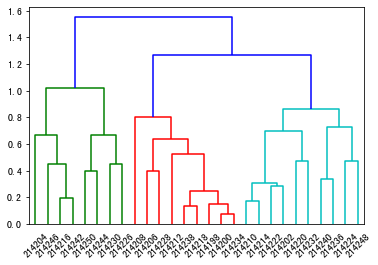

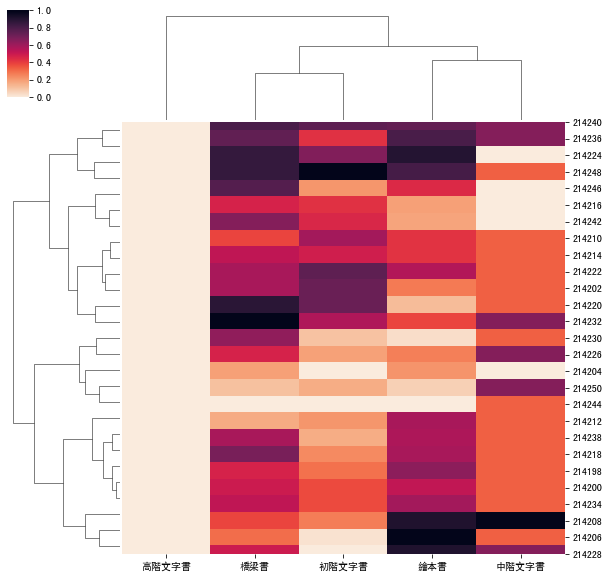

In [124]:
df1 = pd.read_excel("學生閱讀書籍難度表.xlsx",index_col=0)
elbow(df1)
hierarchy_clusting(df1)

# 將三個文字書合併後再進行分群

        繪本書  橋梁書  初階文字書  中階文字書  高階文字書
214216   78   22     25      0      0
214222  108   26     37      1      0
214210   97   19     31      1      0
214200  105   23     23      1      0
214198  115   22     20      1      0
214238  109   26     15      1      0
214214   97   24     27      1      0
214202   85   26     36      1      0
214220   72   37     36      1      0
214250   68    9     15      2      0
214246   99   33     17      0      0
214240  123   34     37      2      0
214230   65   28     13      1      0
214226   84   22     16      2      0
214204   80   12      9      0      0
214206  144   16     10      1      0
214208  137   19     19      3      0
214212  110   11     17      1      0
214218  110   30     18      1      0
214224  136   36     34      0      0
214228  137   23      9      2      0
214232   94   41     30      2      0
214234  111   24     23      1      0
214236  128   32     25      2      0
214242   77   29     26      0      0
214244   62 

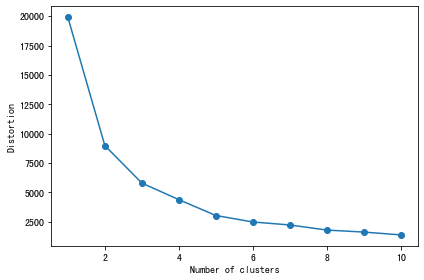


Min max scaled data:
 [[0.19512195 0.47222222 0.42105263]
 [0.56097561 0.58333333 0.76315789]
 [0.42682927 0.38888889 0.60526316]
 [0.52439024 0.5        0.39473684]
 [0.64634146 0.47222222 0.31578947]
 [0.57317073 0.58333333 0.18421053]
 [0.42682927 0.52777778 0.5       ]
 [0.2804878  0.58333333 0.73684211]
 [0.12195122 0.88888889 0.73684211]
 [0.07317073 0.11111111 0.21052632]
 [0.45121951 0.77777778 0.21052632]
 [0.74390244 0.80555556 0.78947368]
 [0.03658537 0.63888889 0.13157895]
 [0.26829268 0.47222222 0.23684211]
 [0.2195122  0.19444444 0.        ]
 [1.         0.30555556 0.05263158]
 [0.91463415 0.38888889 0.34210526]
 [0.58536585 0.16666667 0.23684211]
 [0.58536585 0.69444444 0.26315789]
 [0.90243902 0.86111111 0.65789474]
 [0.91463415 0.5        0.05263158]
 [0.3902439  1.         0.60526316]
 [0.59756098 0.52777778 0.39473684]
 [0.80487805 0.75       0.47368421]
 [0.18292683 0.66666667 0.44736842]
 [0.         0.         0.02631579]
 [0.81707317 0.86111111 1.        ]]


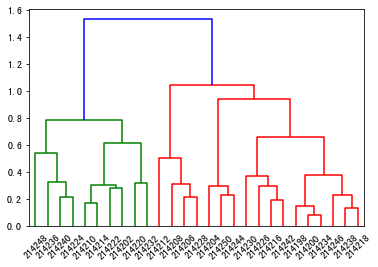

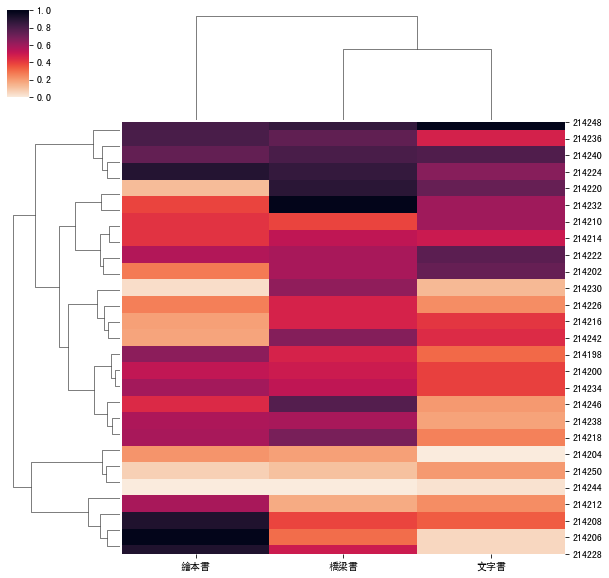

In [125]:
df1 = pd.read_excel("學生閱讀書籍難度表.xlsx",index_col=0)
print(df1)
df1["文字書"]=df1["初階文字書"]+df1["中階文字書"]+df1["高階文字書"]
# print(df1)
df1=df1.drop(["初階文字書","中階文字書","高階文字書"],axis=1)
df1.to_csv("正規化後學生分群結果")
print(df1)
elbow(df1)
hierarchy_clusting(df1)